# Kalbe Products Sales Forecasting

The objective of this project is to develop a forecasting model that can accurately predict sales for the next 14 days. The model should be able to use historical sales data to identify patterns and trends, and make predictions based on those patterns. This will help the business to plan their inventory and staffing levels more effectively, ensuring that they are prepared for changes in demand. To accomplish this objective, the following steps may be taken:

1. Gather historical sales data: Collect data on sales over a significant period of time. In this project, we will use 90 days historical sales data that can be used to train the forecasting model.

2. Explore the data: Analyze the data to identify any trends or patterns that may be useful in predicting future sales. This could include seasonality and trends over time.

3. Choose a forecasting model: Select an appropriate forecasting model based on the characteristics of the data and the nature of the sales process.

4. Train the model: Use the historical data to train the forecasting model, adjusting the model parameters as necessary to optimize performance.

5. Evaluate the model: Use a holdout dataset to evaluate the performance of the model and make any necessary adjustments. This will help to ensure that the model is accurate and reliable.

6. Forecast sales: Use the trained model to forecast sales for the next 14 days based on the most recent sales data available.





# Introduction

My name is Muhamad Fandhi. Data Scientist with a background in Chemical Engineering, I bring a unique combination of technical expertise and analytical skills to the table. My education at the University of Indonesia and passion for utilizing data to drive solutions have honed my strong organizational abilities, teamwork orientation, and exceptional problem-solving skills. I am eager to leverage my analytical mindset and technical knowledge to make a significant impact as a Data Analyst/Data Scientist. With a data-driven approach and a commitment to continuous learning and growth, I am confident in my ability to excel in this field and tackle any challenges that arise.

# External Link

I created a dashboard using Tableau for the forecasting results.

https://public.tableau.com/app/profile/muhamad.fandhi/viz/DashboardKalbe/KalbeProductsSalesForecasting

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_excel('kalbe_data.xlsx',sheet_name=['A1','A2','B1','B2'])
df_a1 = df['A1']
df_a2 = df['A2']
df_b1 = df['B1']
df_b2 = df['B2']
print(df_a1)
print(df_a2)
print(df_b1)
print(df_b2)

    Day Category Product       Sales
0     1        A      A1  100.000000
1     2        A      A1  101.000000
2     3        A      A1  102.010000
3     4        A      A1  103.030100
4     5        A      A1  104.060401
..  ...      ...     ...         ...
85   86        A      A1  196.980000
86   87        A      A1  197.964900
87   88        A      A1  198.954724
88   89        A      A1  199.949498
89   90        A      A1  200.949246

[90 rows x 4 columns]
    Day Category Product        Sales
0     1        A      A2  1000.000000
1     2        A      A2  1005.000000
2     3        A      A2  1010.025000
3     4        A      A2  1015.075125
4     5        A      A2  1020.150501
..  ...      ...     ...          ...
85   86        A      A2  1527.971484
86   87        A      A2  1535.611342
87   88        A      A2  1543.289398
88   89        A      A2  1551.005845
89   90        A      A2  1558.760875

[90 rows x 4 columns]
     Day Category Product   Sales  Event
0      1     

# Exploratory Data Analysis

## Product A1

First, we want to explore the sales data of product A1.

In [3]:
# Showing A1 
df_a1

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401
...,...,...,...,...
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498


In [4]:
# Setting day column as index
df_a1.set_index('Day', inplace=True)
df_a1

,Category,Product,Sales
Day,,,
1,A,A1,100.000000
2,A,A1,101.000000
3,A,A1,102.010000
4,A,A1,103.030100
5,A,A1,104.060401
...,...,...,...
86,A,A1,196.980000
87,A,A1,197.964900
88,A,A1,198.954724


In [5]:
# General info for product A1 data
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  90 non-null     object 
 1   Product   90 non-null     object 
 2   Sales     90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


Here, we can see that there are no missing values inside our product A1 data.

In [6]:
# Statistical overview for product A1 data
df_a1.describe()

,Sales
count,90.000000
mean,150.819298
std,31.200698
min,100.000000
25%,122.718030
50%,149.696822
75%,178.000000
max,210.000000


Here, we can see the statistical overview for our product A1 data. We can see that the data contains 90 days of sales. We can also see the minimum, maximum, median, average of our product a1 sales data. The average sales for this product is 150.8 with minimum 100 and maximum 210. Next, we will plot our sales data for product A1.

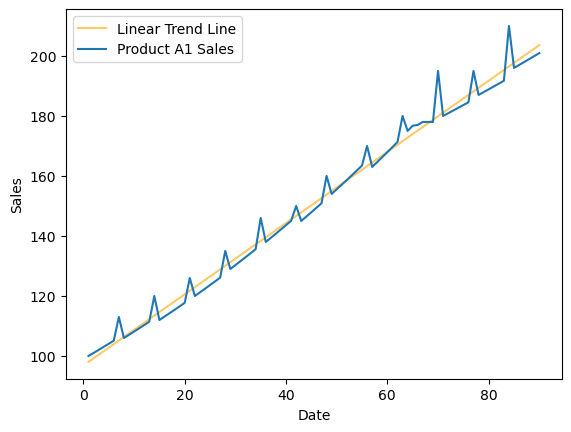

In [7]:
# add linear line
m, b = np.polyfit(range(len(df_a1)), df_a1['Sales'], 1)
plt.plot(df_a1.index, m*range(len(df_a1)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series df_a1
plt.plot(df_a1.index, df_a1['Sales'], label='Product A1 Sales')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Here, we can see the data of our product A1 sales for the past 90 days. The trend is increasing over the past 90 days with a pattern of spike every 7 days/weekly pattern. The spike here is quite small so we can ignore and hopefuly create a forecasting model that can read the pattern.

Next, we will also create a boxplot to see if the spikes are considered outliers or not.

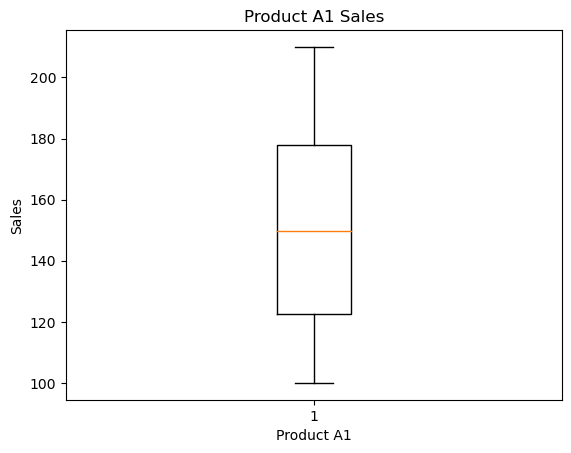

In [8]:
# create a boxplot of the Sales data in df_a1
plt.boxplot(df_a1['Sales'])

# add labels and title
plt.xlabel('Product A1')
plt.ylabel('Sales')
plt.title('Product A1 Sales')

# show the plot
plt.show()

We can see that the data doesn't have outliers and ready to be used for forecasting.

## Product A2

Next, we will explore the sales data of product A2.

In [9]:
# showing A2 sales data
df_a2

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501
...,...,...,...,...
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845


In [10]:
# Setting day column as index
df_a2.set_index('Day', inplace=True)
df_a2

,Category,Product,Sales
Day,,,
1,A,A2,1000.000000
2,A,A2,1005.000000
3,A,A2,1010.025000
4,A,A2,1015.075125
5,A,A2,1020.150501
...,...,...,...
86,A,A2,1527.971484
87,A,A2,1535.611342
88,A,A2,1543.289398


In [11]:
# General info for product A2 data
df_a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  90 non-null     object 
 1   Product   90 non-null     object 
 2   Sales     90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


Here, we can see that there are no missing values inside our product A2 data.

In [12]:
# Statistical overview for product A2 data
df_a2.describe()

,Sales
count,90.000000
mean,1265.010398
std,164.440471
min,1000.000000
25%,1122.953956
50%,1254.749873
75%,1402.011887
max,1558.760875


Here, we can see the statistical overview for our product A2 data. We can see that the data contains 90 days of sales. We can also see the minimum, maximum, median, average of our product a1 sales data. The average sales for this product is 1265.0 with minimum of 1000 and maximum of 1558. Next, we will plot our sales data for product A2.

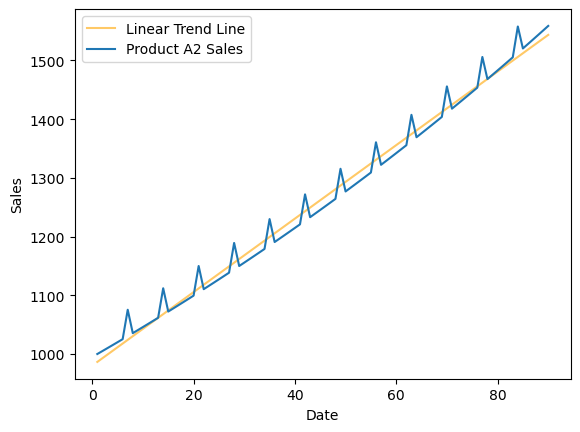

In [13]:
# add linear line
m, b = np.polyfit(range(len(df_a2)), df_a2['Sales'], 1)
plt.plot(df_a2.index, m*range(len(df_a2)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series df_a2
plt.plot(df_a2.index, df_a2['Sales'], label='Product A2 Sales')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Here, we can see the data of our product A2 sales for the past 90 days. The trend is increasing over the past 90 days with a pattern of spike every 7 days/weekly pattern. The pattern is quite similar with the product A2 pattern. The spike here is also quite small so we can ignore and hopefuly create a forecasting model that can read the pattern.

Next, we will also create a boxplot to see if the spikes are considered outliers or not.

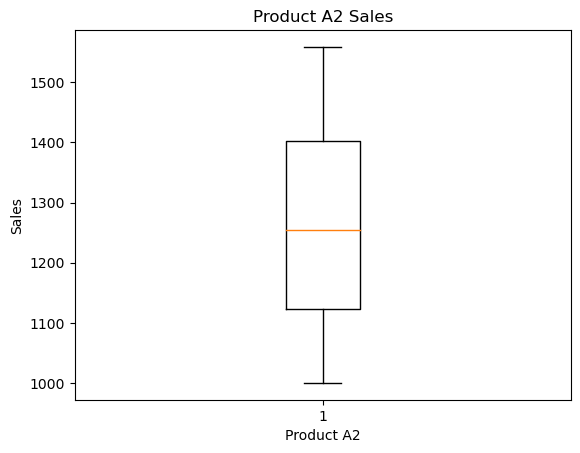

In [14]:
# create a boxplot of the Sales data in df_a2
plt.boxplot(df_a2['Sales'])

# add labels and title
plt.xlabel('Product A2')
plt.ylabel('Sales')
plt.title('Product A2 Sales')

# show the plot
plt.show()

We can see that the data doesn't have outliers and ready to be used for forecasting.

## Product B1

Next, we will explore the sales data of product B1.

In [15]:
# showing B1 sales data
df_b1

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0
...,...,...,...,...,...
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0


In [16]:
# Setting day column as index
df_b1.set_index('Day', inplace=True)
df_b1

,Category,Product,Sales,Event
Day,,,,
1,B,B1,990.0,0
2,B,B1,980.0,0
3,B,B1,1010.0,0
4,B,B1,1010.0,0
5,B,B1,1000.0,0
...,...,...,...,...
100,B,B1,NaN,0
101,B,B1,NaN,1
102,B,B1,NaN,0


In [17]:
# General info for product B1 data
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  104 non-null    object 
 1   Product   104 non-null    object 
 2   Sales     90 non-null     float64
 3   Event     104 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ KB


Here we can see there are some missing values inside our product B1 data. We will handle this in this section. From the general info we can see that the column that contains missing value is the sales value. Now, we want to see when are the sales that are missing.

In [18]:
df_b1[df_b1.isna().any(axis=1)]

,Category,Product,Sales,Event
Day,,,,
91,B,B1,NaN,0
92,B,B1,NaN,0
93,B,B1,NaN,0
94,B,B1,NaN,1
95,B,B1,NaN,0
96,B,B1,NaN,0
97,B,B1,NaN,0
98,B,B1,NaN,0
99,B,B1,NaN,0


Here, we can see that the missing values occured after 90 days of sales. We will drop these rows that contains missing values because they are no use to us.

In [19]:
# dropping missing values
df_b1.dropna(inplace=True)

We will check again if the missing values is already dropped.

In [20]:
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  90 non-null     object 
 1   Product   90 non-null     object 
 2   Sales     90 non-null     float64
 3   Event     90 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


Here, we can see that the missing values are already removed from our product B1 sales data. Before, we check the statistical overview we are noticing that there are another column other than sales, event column. We will explore this later and see the contribution of this column to our product B1 sales data.

In [21]:
# Statistical overview for product B1 data
df_b1.describe()

,Sales,Event
count,90.000000,90.000000
mean,1063.055556,0.111111
std,197.696872,0.316030
min,970.000000,0.000000
25%,980.000000,0.000000
50%,1000.000000,0.000000
75%,1010.000000,0.000000
max,1734.000000,1.000000


Here, we can see the statistical overview for our product B1 data. We can see that the data contains 90 days of sales. We can also see the minimum, maximum, median, average of our product a1 sales data. The average sales for this product is 1063.0 with minimum of 970 and maximum of 1734. Next, we will plot our sales data for product B1.

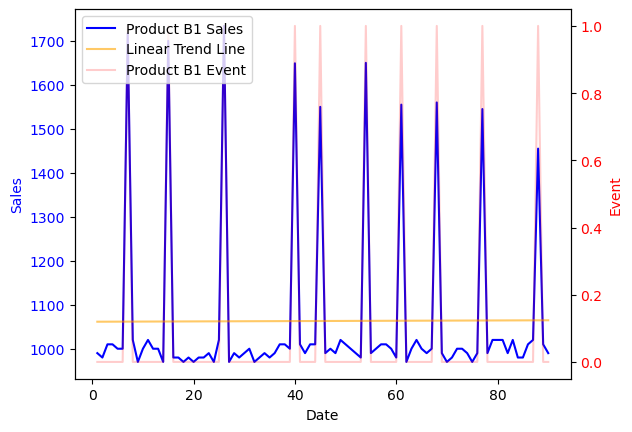

In [22]:
fig, ax1 = plt.subplots()

# plot the first y-axis
ax1.plot(df_b1.index, df_b1['Sales'], label='Product B1 Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
m, b = np.polyfit(range(len(df_b1)), df_b1['Sales'], 1)
ax1.plot(df_b1.index, m*range(len(df_b1)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# create a second y-axis
ax2 = ax1.twinx()

# plot the second y-axis
ax2.plot(df_b1.index, df_b1['Event'], label='Product B1 Event', color='red', alpha=0.2)
ax2.set_ylabel('Event', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Here, we can see the data of our product B1 sales for the past 90 days. The line chart shows that there are some exploding spikes/big spikes that occur simultaneously with the events held for product B1. The event and spikes (for sales) occured randomly throughout 90 days of sales. There are no pattern on the event (not weekly, not monthly, also not every n-days). This might make it difficult for the model to forecast the sales for product B1. Before we jump into conclusion, let's create the boxplot to see whether these spikes are considered outliers.

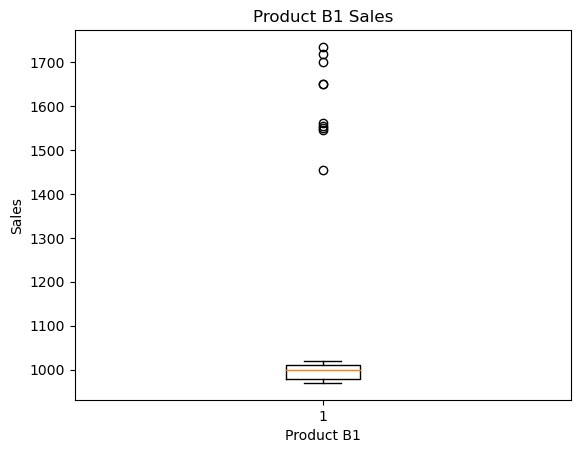

In [23]:
# create a boxplot of the Sales data in df_b1
plt.boxplot(df_b1['Sales'])

# add labels and title
plt.xlabel('Product B1')
plt.ylabel('Sales')
plt.title('Product B1 Sales')

# show the plot
plt.show()

We can see that the product B1 sales data contains some outliers. This might be the spikes that we found inside the line chart graph previously. As said before, these spikes/outliers might make it difficult for the model to forecast the sales for product B1. So, we will handle these spikes by manipulating the sales data on each days of event. This handling will be done later in the preprocessing section.

## Product B2

Next, we will explore the sales data of product B2.

In [24]:
# showing B2 sales data
df_b2

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


In [25]:
# Setting day column as index
df_b2.set_index('Day', inplace=True)
df_b2

,Category,Product,Sales
Day,,,
1,B,B2,NaN
2,B,B2,NaN
3,B,B2,NaN
4,B,B2,NaN
5,B,B2,NaN
...,...,...,...
100,B,B2,NaN
101,B,B2,NaN
102,B,B2,NaN


In [26]:
# General info for product B2 data
df_b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  104 non-null    object 
 1   Product   104 non-null    object 
 2   Sales     30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


Here we can see there are many missing values inside our product B2 data. We will handle this in this section. From the general info we can see that the column that contains missing value is the sales value. Now, we want to see when are the sales that are missing.

In [27]:
df_b2[df_b2.isna().any(axis=1)]

,Category,Product,Sales
Day,,,
1,B,B2,NaN
2,B,B2,NaN
3,B,B2,NaN
4,B,B2,NaN
5,B,B2,NaN
...,...,...,...
100,B,B2,NaN
101,B,B2,NaN
102,B,B2,NaN


There are 74 rows of data that contain missing values, we can't see the details so we will also check when are the data that is not contain missing values.

In [28]:
df_b2[df_b2.notna().all(axis=1)]

,Category,Product,Sales
Day,,,
61,B,B2,10.000000
62,B,B2,20.000000
63,B,B2,40.000000
64,B,B2,80.000000
65,B,B2,144.000000
66,B,B2,259.200000
67,B,B2,300.000000
68,B,B2,450.000000
69,B,B2,560.000000


There are only 30 days of product B2 sales data that we have. We will have to work with just this only. So, it is better for us to drop the other rows that contains missing values.

In [29]:
# dropping missing values
df_b2.dropna(inplace=True)

We will check again if the missing values is already dropped.

In [30]:
df_b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 61 to 90
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  30 non-null     object 
 1   Product   30 non-null     object 
 2   Sales     30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 960.0+ bytes


Here, we can see that the missing values are already removed from our product B2 sales data. 

In [31]:
# Statistical overview for product B2 data
df_b2.describe()

,Sales
count,30.000000
mean,2761.875726
std,2055.025674
min,10.000000
25%,477.500000
50%,3440.880000
75%,4776.628424
max,4980.657414


Here, we can see the statistical overview for our product B2 data. We can see that the data contains 30 days of sales. We can also see the minimum, maximum, median, average of our product a1 sales data. The average sales for this product is 2761.8 with minimum of 10 and maximum of 4980.6. Next, we will plot our sales data for product B2.

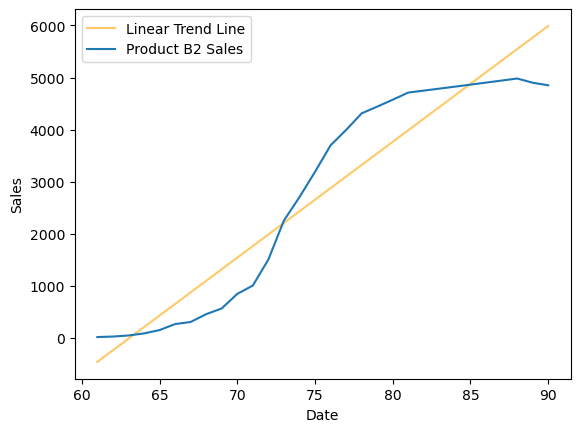

In [32]:
# add linear line
m, b = np.polyfit(range(len(df_b2)), df_b2['Sales'], 1)
plt.plot(df_b2.index, m*range(len(df_b2)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series df_b2
plt.plot(df_b2.index, df_b2['Sales'], label='Product B2 Sales')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Here, we can see the data of our product B2 sales for the past 30 days. The trend is increasing over the past 90 days with a sigmoid pattern (an S-shape growth pattern). The pattern shows that the sales start slow in the beginning part, and then rises quickly approaching an exponential growth rate, but then decreases in a negative acceleration stage. But we can also see at the last day (day 90), the sales dropped a little bit indicating more drop will happen or the sales will continue to stabliize without dropping or increasing. We will see later in the forecasting section.

Next, we will also create a boxplot to see if the there are outliers or not in our product B2 sales data.

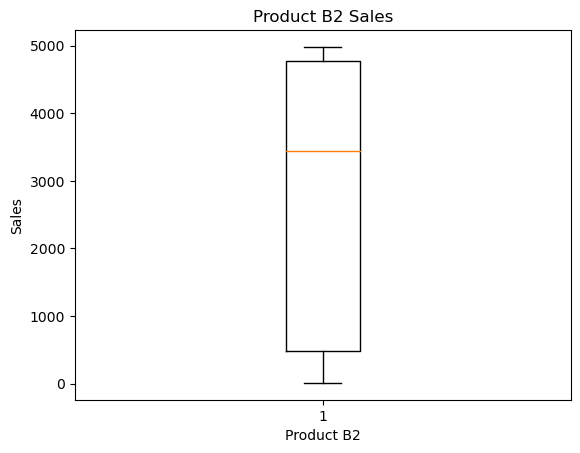

In [33]:
# create a boxplot of the Sales data in df_a2
plt.boxplot(df_b2['Sales'])

# add labels and title
plt.xlabel('Product B2')
plt.ylabel('Sales')
plt.title('Product B2 Sales')

# show the plot
plt.show()

We can see that the data doesn't have outliers and ready to be used for forecasting.

# Preprocessing

## Handling Outliers

In this section, we will process our data that have been explored before going into modelling section. We noticed that in our product B1 sales data, there are big increasing spikes of sales that happen with events that held for product B1. But, the events that was held don't have any pattern of occurance. So, we will handle this spikes by manipulatiing the sales value. 

Before we manipulate the product B1 sales, we will find the value that is suitable for the manipulating method. We will calculate the skewness first to see if the data is skewed or not.

In [34]:
# checking skewness
df_b1.Sales.skew().round(2)

2.59

Since the data is highly skewed we will manipulate the sales data on event by replacing the value with the median of the sales data.

In [35]:
# slicing sales data with event
df_b1[(df_b1['Event'] == 1)]

,Category,Product,Sales,Event
Day,,,,
7,B,B1,1717.0,1
15,B,B1,1700.0,1
26,B,B1,1734.0,1
40,B,B1,1649.0,1
45,B,B1,1550.0,1
54,B,B1,1650.0,1
61,B,B1,1555.0,1
68,B,B1,1560.0,1
77,B,B1,1545.0,1


Here, we can see the data that have event all have high values which resulted spike in our line chart earlier. We will replace the sales value with the median.

In [36]:
# replacing the value of sales with event by the median
df_b1.loc[df_b1['Event'] == 1, 'Sales'] = df_b1.Sales.median()

# checking whether the capping is done right
df_b1[(df_b1['Event'] == 1)]

,Category,Product,Sales,Event
Day,,,,
7,B,B1,1000.0,1
15,B,B1,1000.0,1
26,B,B1,1000.0,1
40,B,B1,1000.0,1
45,B,B1,1000.0,1
54,B,B1,1000.0,1
61,B,B1,1000.0,1
68,B,B1,1000.0,1
77,B,B1,1000.0,1


Here, we have the replaced value of our product B1 sales data. Now we want to plot the line chart after we manipulate the data.

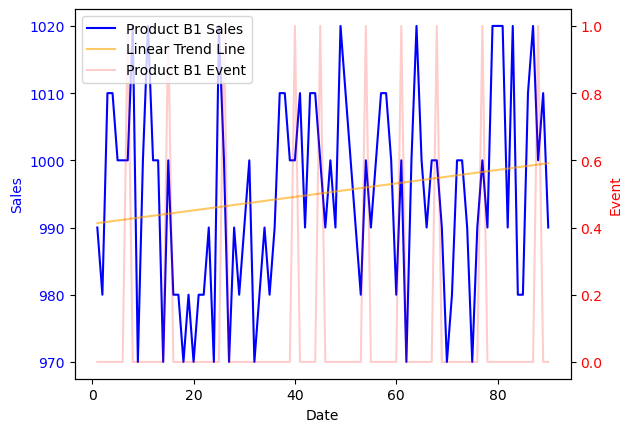

In [37]:
fig, ax1 = plt.subplots()

# plot the first y-axis
ax1.plot(df_b1.index, df_b1['Sales'], label='Product B1 Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
m, b = np.polyfit(range(len(df_b1)), df_b1['Sales'], 1)
ax1.plot(df_b1.index, m*range(len(df_b1)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# create a second y-axis
ax2 = ax1.twinx()

# plot the second y-axis
ax2.plot(df_b1.index, df_b1['Event'], label='Product B1 Event', color='red', alpha=0.2)
ax2.set_ylabel('Event', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Now the product B1 sales data have no big spikes.

## Checking Stationarity

Forecasting model needs the data to be stationary. So, we need to know the data used will be stationary at what differentiation. In this section, we will find out the number of differentiation to make the data stationary.

First, we extract the sales data into new variable named ts1 for product A1, ts2 for product A2, ts3 for product B1, and ts4 for product B2.

In [38]:
# extracting sales data
ts1 = df_a1['Sales']
ts2 = df_a2['Sales']
ts3 = df_b1['Sales']
ts4 = df_b2['Sales']

### Product A1

First, we will check how many differentiation to make the product A1 sales data stationary.

ADF Statistic: -3.686061
p-value: 0.004314
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587
The time series is stationary.


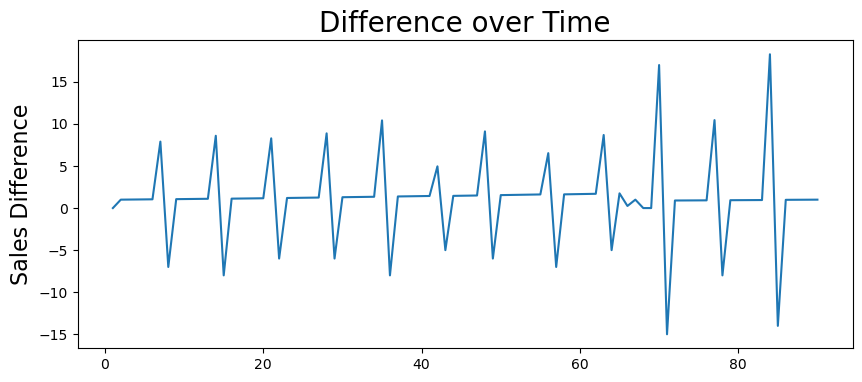

In [39]:
# differencing product A1 sales data
fd_ts1 = ts1.diff().fillna(0)

# checking stationarity using adfuller
result = adfuller(fd_ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('The time series is non-stationary.')
else:
    print('The time series is stationary.')

# plotting the stationarity of the data
plt.figure(figsize=(10,4))
plt.plot(fd_ts1)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
plt.show()

Here, we can see the product A1 sales become stationary after 1 differencing. We can also see that the stationary data visualization above. The visualization makes the pattern of our data clearer.

### Product A2

Next, we will check how many differentiation to make the product A2 sales data stationary.

ADF Statistic: -6.662893
p-value: 0.000000
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586
The time series is stationary.


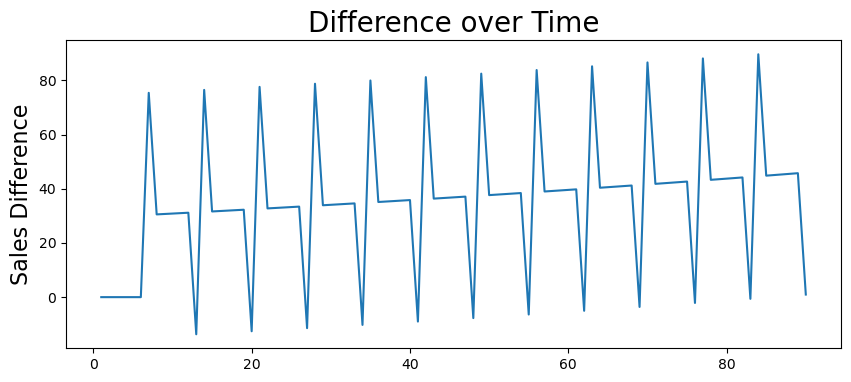

In [40]:
# differencing product A2 sales data
fd_ts2 = ts2.diff(6).fillna(0)

# checking stationarity using adfuller
result = adfuller(fd_ts2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('The time series is non-stationary.')
else:
    print('The time series is stationary.')

# plotting the stationarity of the data
plt.figure(figsize=(10,4))
plt.plot(fd_ts2)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
plt.show()

Here, we can see the product A2 sales become stationary after 6 differencing. We can also see that the stationary data visualization above. The visualization makes the pattern of our data clearer.

### Product B1

Next, we will check how many differentiation to make the product B1 sales data stationary.

ADF Statistic: -6.393273
p-value: 0.000000
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585
The time series is stationary.


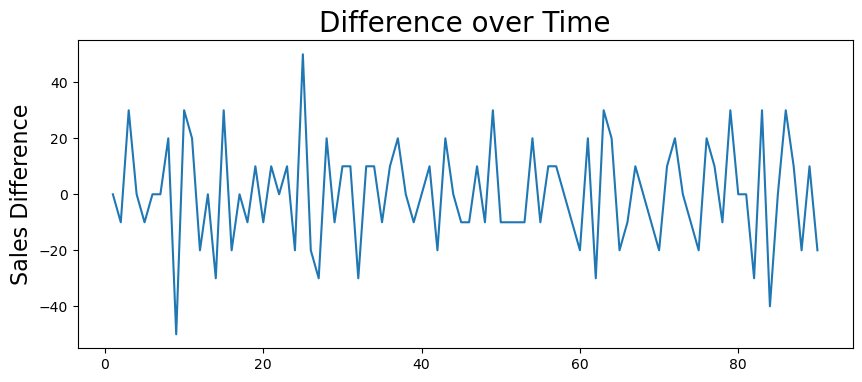

In [41]:
# differencing product B1 sales data
fd_ts3 = ts3.diff().fillna(0)

# checking stationarity using adfuller
result = adfuller(fd_ts3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('The time series is non-stationary.')
else:
    print('The time series is stationary.')

# plotting the stationarity of the data
plt.figure(figsize=(10,4))
plt.plot(fd_ts3)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
plt.show()

Here, we can see the product B1 sales become stationary after 1 differencing. We can also see that the stationary data visualization above. The visualization tells us that there is no pattern in this data. This means creating the model for this data will be challenging.

### Product B2

Next, we will check how many differentiation to make the product B2 sales data stationary.

ADF Statistic: -3.114068
p-value: 0.025529
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
The time series is stationary.


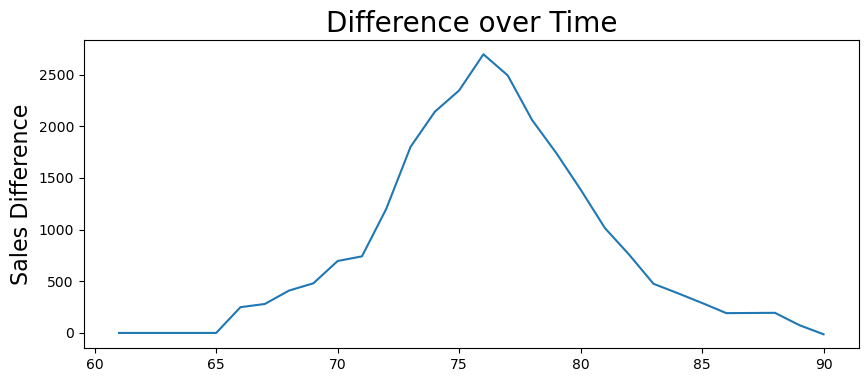

In [42]:
# differencing product B2 sales data
fd_ts4 = ts4.diff(5).fillna(0)

# checking stationarity using adfuller
result = adfuller(fd_ts4)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('The time series is non-stationary.')
else:
    print('The time series is stationary.')

# plotting the stationarity of the data
plt.figure(figsize=(10,4))
plt.plot(fd_ts4)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
plt.show()

Here, we can see the product B2 sales become stationary after 5 differencing. We can also see that the stationary data visualization above. The visualization doesn't show any repetitive pattern. This might happen because we only have small amount of data.

## Identifying Autocorrelation

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are tools used in time series analysis to understand the autocorrelation of a time series. Autocorrelation refers to the correlation of a variable with itself over time, i.e., the correlation between a value and the lagged version of itself.

The ACF plot shows the correlation of a time series with its lagged values. Specifically, it shows the correlation coefficient between the values of the time series at lag k and the values at lag 0. A high correlation coefficient at a particular lag suggests that the values at that lag are related to the current value.

The PACF plot, on the other hand, shows the correlation between the time series and its lagged values while controlling for the values at other lags. In other words, it shows the correlation coefficient between the values of the time series at lag k and the values at lag 0, with the effect of lags 1 to k-1 removed.

Both the ACF and PACF plots can be used to identify the order of autoregressive (AR) and moving average (MA) processes, which are common models used in time series analysis.

### Product A1

First, we will identify the order of autoregressive and moving average for product A1.

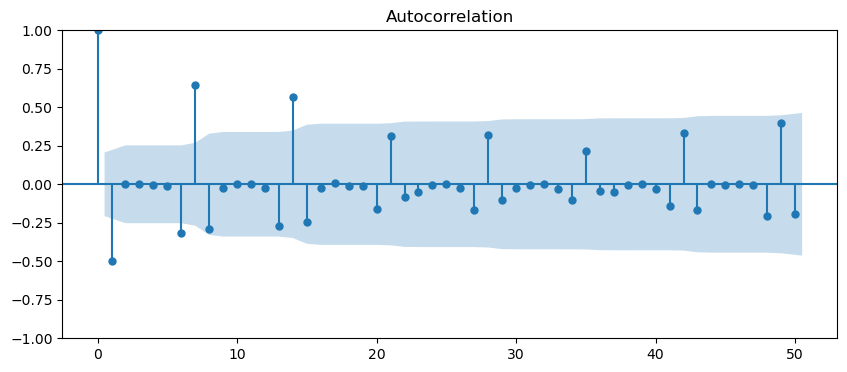

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(fd_ts1, lags=50,ax=ax)

Based on the ACF plot, the order for moving average that can be used are 0,1,6,7,14.

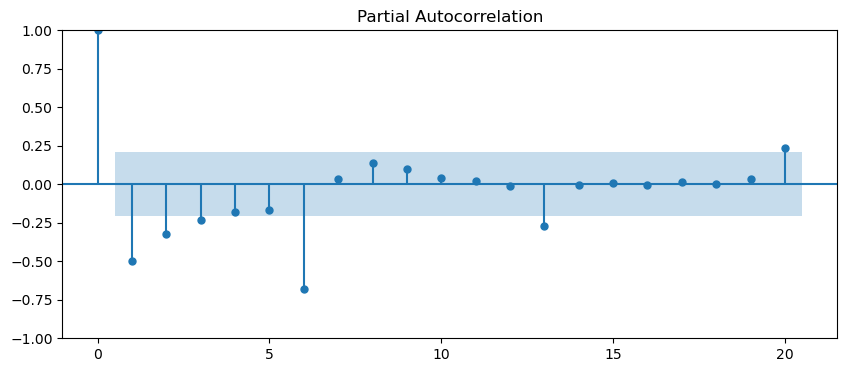

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(fd_ts1,ax=ax,method='ywm')

Based on the PACF plot, the order for AutoRegressive that can be used are 0,1,2,3,6,13.

### Product A2

Next, we will identify the order of autoregressive and moving average for product A2.

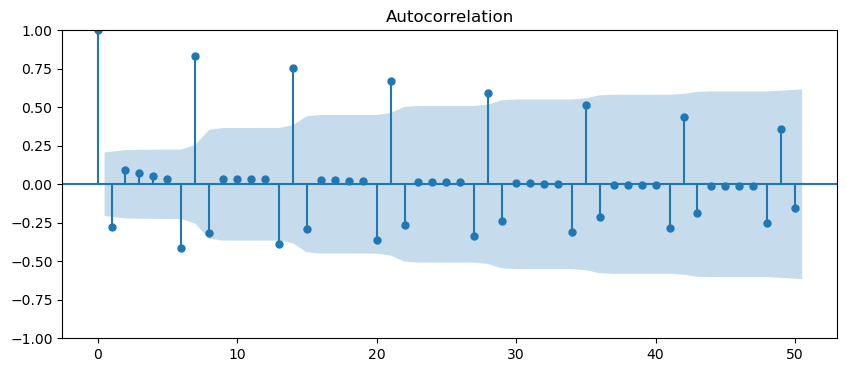

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(fd_ts2, lags=50,ax=ax)

Based on the ACF plot, the order for moving average that can be used are 0,1,6,7,13,14.

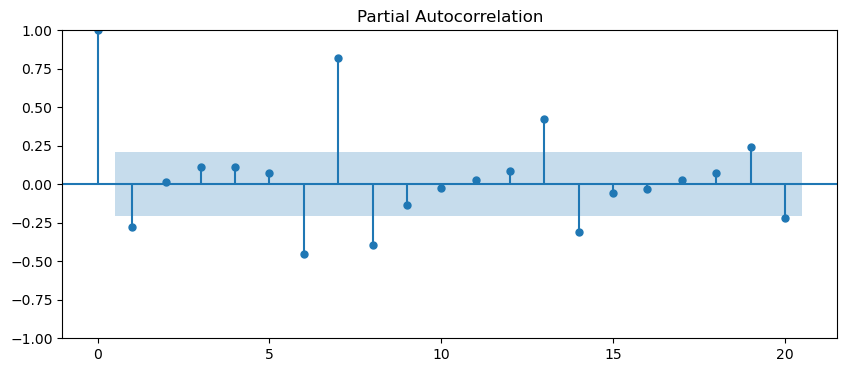

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(fd_ts2,ax=ax,method='ywm')

Based on the PACF plot, the order for AutoRegressive that can be used are 0,1,2,3,6,7,8,13,14.

### Product B1

Next, we will identify the order of autoregressive and moving average for product B1.

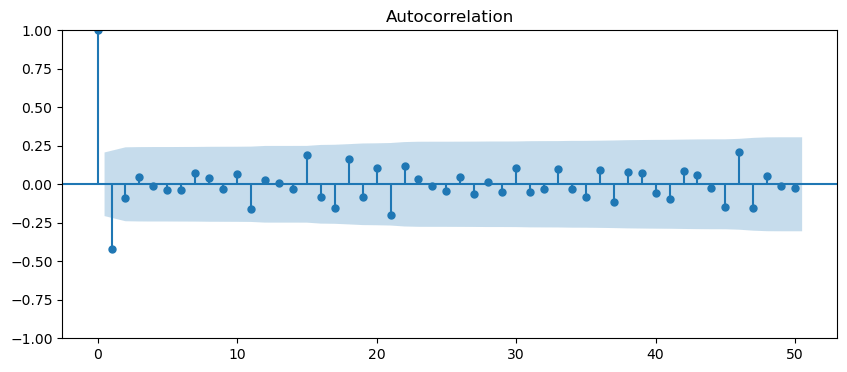

In [47]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(fd_ts3, lags=50,ax=ax)

Based on the ACF plot, the order for moving average that can be used are 0,1.

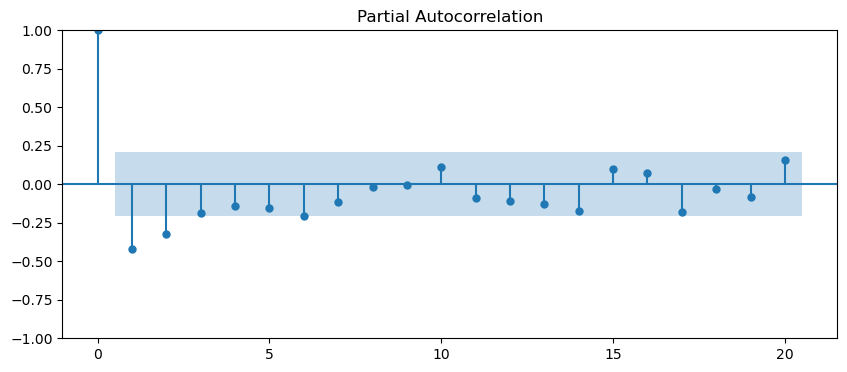

In [48]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(fd_ts3,ax=ax,method='ywm')

Based on the PACF plot, the order for AutoRegressive that can be used are 0,1,2,6.

### Product B2


Next, we will identify the order of autoregressive and moving average for product B2.

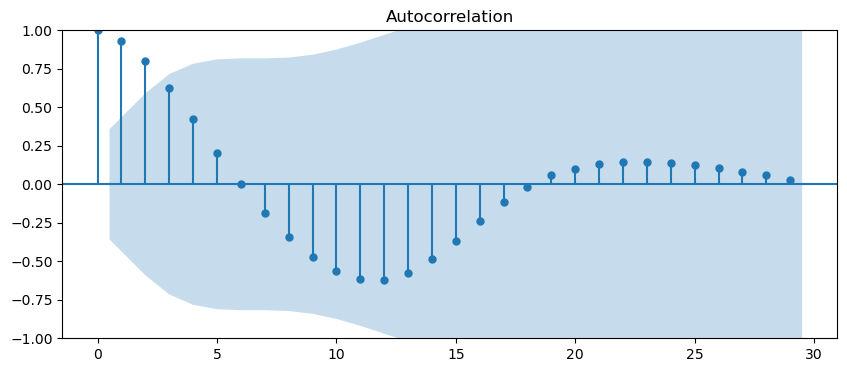

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(fd_ts4, lags=29,ax=ax)

Based on the ACF plot, the order for moving average that can be used are 0,1,2.

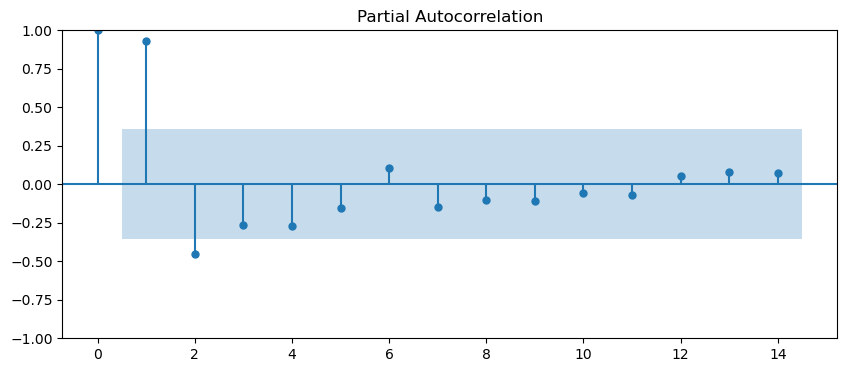

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(fd_ts4,ax=ax,method='ywm',lags=14)

Based on the PACF plot, the order for AutoRegressive that can be used are 0,1,2.

# Forecasting

After we get all the information needed and processing the data for creating the forecasting model, we can start creating the forecasting model. In this project, we will create the forecasting model using SARIMA (Seasonal AutoRegressive Integrated Moving Average). The reason for choosing this model is because most of our data have seasonal pattern (weekly). The order that will be used for each forecasting model is based on the exploration we have done in the previous sections.

After creating the model, we will also evaluate the model using MAPE (Mean Absolute Percentage Error) and MAE (Mean Absolute Error). The reason for using MAPE is because the error will be at a percentage unit, which means it will represent any values regarding the size of the values (whether it is in hundreds or thousands, MAPE will represent all of them). MAE is for supporting the MAPE to see the average error but the units of the error values will have to be compared to the units of the data used. 

## Product A1

Now, we want to create a forecasting model for predicting product A1 sales 14 days ahead. First, we create a copy of our data just to be safe and then reset the index (from 0-89, still 90 days starting from 0). And then, splits the "data_a1" into training and testing sets, with the first 72 data points being used for training and the remaining 18 data points being used for testing. The variable "frequency" is set to 7, indicating that the time series data has a weekly frequency.

Next, we create a SARIMAX model and fits it to the training data. The order of the SARIMAX model is set to (0, 1, 0), while the seasonal order is set to (0, 1, 2, frequency). These order number is the number we got from the exploration in the previous sections. The model is then used to generate predictions for the test data set and the next 15 time steps.

After we create the model, we calculate the model performance using the mean absolute percentage error (MAPE) and the mean absolute error (MAE). 

Finally, we create plots the original time series data and the predicted values. The original data is shown in blue, while the predicted values are shown in orange. The x-axis shows the day number and the y-axis shows the value of the sales.

MAPE : 0.005775022980074472
MAE : 1.1347383284793233


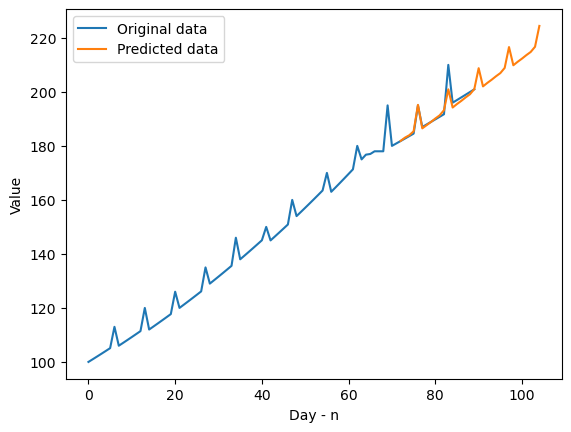

In [51]:
# Copu data to data_a1
data_a1 = df_a1.copy()

# Set the index to a range of integers
data_a1.index = range(len(data_a1))

# Set the frequency_a1 of the data_a1 (assuming daily data_a1)
frequency_a1 = 7

# Split the data_a1 into train and test sets
train_a1 = data_a1['Sales'].iloc[:72]
test_a1 = data_a1['Sales'].iloc[72:]

# Create and fit the SARIMAX model
model_a1 = SARIMAX(train_a1, order=(0, 1, 0), seasonal_order=(0, 1, 2, frequency_a1))
model_fit_a1 = model_a1.fit()

# Generate predictions for the test set
predictions_a1 = model_fit_a1.forecast(steps=len(test_a1)+15)

# Evaluate the model performance (MAPE & MAE)
mape_a1 = mean_absolute_percentage_error(predictions_a1[:18],test_a1)
mae_a1 = mean_absolute_error(predictions_a1[:18],test_a1)
print(f'MAPE : {mape_a1}')
print(f'MAE : {mae_a1}')

# Plot the original data_a1 and the predicted values
plt.plot(data_a1.index, data_a1['Sales'], label='Original data')
plt.plot(predictions_a1.index, predictions_a1, label='Predicted data')
plt.legend()
plt.xlabel('Day - n')
plt.ylabel('Value')
plt.show()

### Evaluation

The model was successful in creating a forecast for product A1 sales based on the graph. The historical data of product A1 sales also showed a weekly pattern, and the model was able to accurately create a forecast with the same pattern. The model's performance was evaluated using MAPE and MAE scores.

The MAPE score for this model is 0.5%, which is very good. This means that for each data point in the test data, the model's forecast has an error of only 0.5%. The MAE score for this model is also very good, at 1.1. This means that on average, the model's forecast has an error of 1.1 units in sales for each data point in the test data. Given that the sales data is in hundreds, an average error of 1.1 is very low.

In conclusion, the model was able to create an accurate forecast for product A1 with very low error.

In [52]:
# showing prediction result for product A1
pred_a1 = predictions_a1.tail(15)
pred_a1

90     208.775289
91     202.034324
92     203.322823
93     204.501947
94     205.781138
95     206.953846
96     208.869940
97     216.599738
98     209.858773
99     211.147273
100    212.326397
101    213.605587
102    214.778295
103    216.694389
104    224.424187
Name: predicted_mean, dtype: float64

## Product A2

Next, we want to create a forecasting model for predicting product A2 sales 14 days ahead. First, we create a copy of our data just to be safe and then reset the index (from 0-89, still 90 days starting from 0). And then, splits the "data_a2" into training and testing sets, with the first 72 data points being used for training and the remaining 18 data points being used for testing. The variable "frequency" is set to 7, indicating that the time series data has a weekly frequency. Pretty much the same with product A1 forecasting model.

Next, we create a SARIMAX model and fits it to the training data. The order of the SARIMAX model is set to (0, 0, 0), while the seasonal order is set to (0, 6, 0, frequency). These order number is the number we got from the exploration in the previous sections. The model is then used to generate predictions for the test data set and the next 15 time steps.

After we create the model, we calculate the model performance using the mean absolute percentage error (MAPE) and the mean absolute error (MAE). 

Finally, we create plots the original time series data and the predicted values. The original data is shown in blue, while the predicted values are shown in orange. The x-axis shows the day number and the y-axis shows the value of the sales.

MAPE : 8.427836618963745e-08
MAE : 0.00012878563311207673


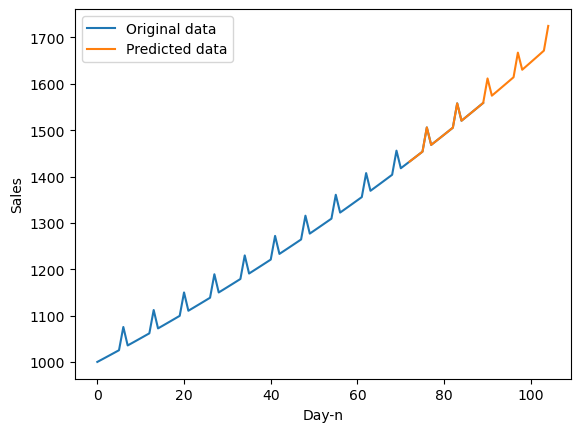

In [53]:
# Load data_a2
data_a2 = df_a2.copy()

# Set the index to a range of integers
data_a2.index = range(len(data_a2))

# Set the frequency of the data_a2 (assuming daily data_a2)
frequency_a2 = 7

# Split the data_a2 into train and test sets
train_a2 = data_a2['Sales'].iloc[:72]
test_a2 = data_a2['Sales'].iloc[72:]

# Create and fit the SARIMAX model
model_a2 = SARIMAX(train_a2, order=(0, 0, 0), seasonal_order=(0, 6, 0, frequency_a2))
model_fit_a2 = model_a2.fit()

# Generate predictions for the test set
predictions_a2 = model_fit_a2.forecast(steps=len(test_a2)+15)

# Evaluate the model performance (MAPE & MAE)
mape_a2 = mean_absolute_percentage_error(predictions_a2[:18],test_a2)
mae_a2 = mean_absolute_error(predictions_a2[:18],test_a2)
print(f'MAPE : {mape_a2}')
print(f'MAE : {mae_a2}')

# Plot the original data_a2 and the predicted values
plt.plot(data_a2.index, data_a2['Sales'], label='Original data')
plt.plot(predictions_a2.index, predictions_a2, label='Predicted data')
plt.legend()
plt.xlabel('Day-n')
plt.ylabel('Sales')
plt.show()

### Evaluation

Based on the graph, it appears that the model was successful in forecasting product A2 sales. The historical data of product A2 sales showed a weekly pattern and the model was able to create a forecast with the same pattern. To evaluate the performance of the model, two metrics were used: MAPE and MAE.

The MAPE score for this model is almost zero, which means that the forecast of the model has almost no error for each data point in the test data. This is a good indication that the model is highly accurate. The MAE number for this model is also very low, which means that on average, the forecast of the model has an error of 0 units in sales for each data point in the test data.

In conclusion, the model was able to create a highly accurate forecast for product A2 with very little error or close to perfection.

In [54]:
# showing prediction result for product A2
pred_a2 = predictions_a2.tail(15)
pred_a2

90     1611.554344
91     1574.387033
92     1582.258968
93     1590.169875
94     1598.120724
95     1606.111328
96     1614.141884
97     1667.212594
98     1630.323486
99     1638.475104
100    1646.666746
101    1654.900079
102    1663.174580
103    1671.490453
104    1724.847905
Name: predicted_mean, dtype: float64

## Product B1

Next, we want to create a forecasting model for predicting product B1 sales 14 days ahead. First, we create a copy of our data just to be safe and then reset the index (from 0-89, still 90 days starting from 0). And then, splits the "data_b1" into training and testing sets, with the first 72 data points being used for training and the remaining 18 data points being used for testing. The variable "frequency" is set to 14, indicating that the time series data has a bi-weekly frequency.

Next, we create a SARIMAX model and fits it to the training data. The order of the SARIMAX model is set to (0, 0, 0), while the seasonal order is set to (0, 1, 6, frequency). These order number is the number we got from the exploration in the previous sections. The model is then used to generate predictions for the test data set and the next 15 time steps.

After we create the model, we calculate the model performance using the mean absolute percentage error (MAPE) and the mean absolute error (MAE). 

Finally, we create plots the original time series data and the predicted values. The original data is shown in blue, while the predicted values are shown in orange. The x-axis shows the day number and the y-axis shows the value of the sales.

MAPE : 0.014830593151447809
MAE : 14.73581467050345


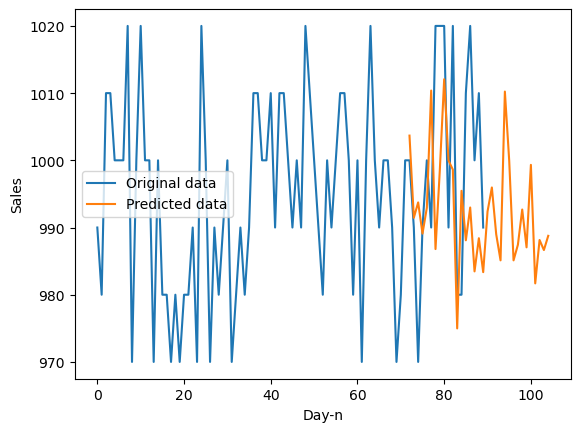

In [55]:
# Load data_b1
data_b1 = df_b1.copy()

# Set the index to a range of integers
data_b1.index = range(len(data_b1))

# Set the frequency of the data_b1 (assuming daily data_b1)
frequency_b1 = 14

# Split the data_b1 into train and test sets
train_b1 = data_b1['Sales'].iloc[:72]
test_b1 = data_b1['Sales'].iloc[72:]

# Create and fit the SARIMAX model
model_b1 = SARIMAX(train_b1, order=(0, 0, 0), seasonal_order=(0, 1, 6, frequency_b1))
model_fit_b1 = model_b1.fit()

# Generate predictions for the test set
predictions_b1 = model_fit_b1.forecast(steps=len(test_b1)+15)

# Evaluate the model performance (MAPE & MAE)
mape_b1 = mean_absolute_percentage_error(predictions_b1[:18],test_b1)
mae_b1 = mean_absolute_error(predictions_b1[:18],test_b1)
print(f'MAPE : {mape_b1}')
print(f'MAE : {mae_b1}')

# Plot the original data_b1 and the predicted values
plt.plot(data_b1.index, data_b1['Sales'], label='Original data')
plt.plot(predictions_b1.index, predictions_b1, label='Predicted data')
plt.legend()
plt.xlabel('Day-n')
plt.ylabel('Sales')
plt.show()

Based on the graph, it appears that the model was successful in forecasting product B1 sales. The historical data of product B1 sales doesn't show any pattern and the model was able to create a forecast with an artificial pattern. To evaluate the performance of the model, two metrics were used: MAPE and MAE.

The MAPE score for this model is almost 1%, which means that the forecast of the model has 1% error for each data point in the test data. This is a good indication that the model is highly accurate. The MAE number for this model is also very low 14.7, which means that on average, the forecast of the model has an error of 14.7 units in sales for each data point in the test data.

In conclusion, the model was able to create a highly accurate forecast for product B1 with very low average error.

In [56]:
# showing prediction result for product B1
pred_b1 = predictions_b1.tail(15)
pred_b1

90      992.382084
91      995.959102
92      988.996117
93      985.115135
94     1010.231739
95      999.937096
96      985.115135
97      987.427945
98      992.676740
99      987.049485
100     999.325762
101     981.687233
102     988.146653
103     986.648142
104     988.764121
Name: predicted_mean, dtype: float64

## Product B2

Next, we want to create a forecasting model for predicting product B2 sales 14 days ahead. First, we create a copy of our data just to be safe and then reset the index (from 0-29, still 30 days starting from 0). And then, splits the "data_b2" into training and testing sets, with the first 21 data points being used for training and the remaining 9 data points being used for testing.

Next, we create a SARIMAX model and fits it to the training data. The order of the SARIMAX model is set to (1, 0, 1), while the seasonal order is set to (1, 0, 1, frequency). These order number is the number we got from the exploration in the previous sections. The model is then used to generate predictions for the test data set and the next 15 time steps.

After we create the model, we calculate the model performance using the mean absolute percentage error (MAPE) and the mean absolute error (MAE). 

Finally, we create plots the original time series data and the predicted values. The original data is shown in blue, while the predicted values are shown in orange. The x-axis shows the day number and the y-axis shows the value of the sales.

MAPE : 0.009592523153387216
MAE : 46.61573731365186


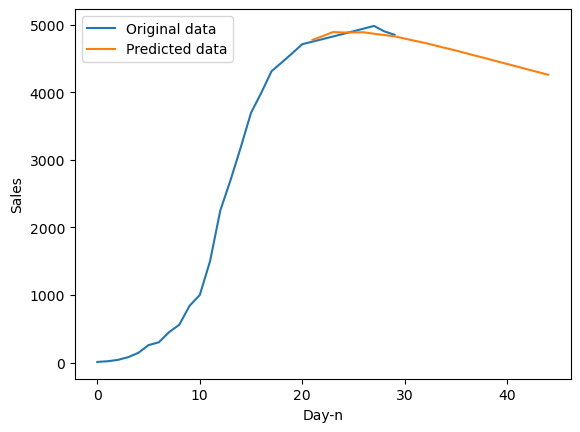

In [57]:
# Load data_b2
data_b2 = df_b2.copy()

# Set the index to a range of integers
data_b2.index = range(len(data_b2))

# Set the frequency of the data_b2 (assuming daily data_b2)
frequency_b2 = 6

# Split the data_b2 into train and test sets
train_b2 = data_b2['Sales'].iloc[:21]
test_b2 = data_b2['Sales'].iloc[21:]

# Create and fit the SARIMAX model
model_b2 = SARIMAX(train_b2, order=(1, 0, 1), seasonal_order=(1, 0, 1, frequency_b2))
model_fit_b2 = model_b2.fit()

# Generate predictions for the test set
predictions_b2 = model_fit_b2.forecast(steps=len(test_b2)+15)

# Evaluate the model performance (MAPE & MAE)
mape_b2 = mean_absolute_percentage_error(predictions_b2[:9],test_b2)
mae_b2 = mean_absolute_error(predictions_b2[:9],test_b2)
print(f'MAPE : {mape_b2}')
print(f'MAE : {mae_b2}')

# Plot the original data_b2 and the predicted values
plt.plot(data_b2.index, data_b2['Sales'], label='Original data')
plt.plot(predictions_b2.index, predictions_b2, label='Predicted data')
plt.legend()
plt.xlabel('Day-n')
plt.ylabel('Sales')
plt.show()

Based on the graph, it appears that the model was successful in forecasting product B2 sales. The historical data of product B2 sales show a pattern of sigmoid (S-shaped growth) and the model was able to create a forecast with an artificial pattern that continues the historical data. To evaluate the performance of the model, two metrics were used: MAPE and MAE.

The MAPE score for this model is almost 0.9%, which means that the forecast of the model has 0.9% error for each data point in the test data. This is a good indication that the model is highly accurate. The MAE number for this model is also very low 46.6, which means that on average, the forecast of the model has an error of 46.6 units in sales for each data point in the test data. The score we achieved for forecasting product B2 looks good, but it's important to note that we only had 30 days of data. This means that the accuracy of our model may not be as reliable as it would be with more data.

While our model performed well on the test set, forecasting 14 days ahead is a more difficult task, and there may be more uncertainty in the results.

In conclusion, our model produced a highly accurate forecast for product B2 with very low error, but we cannot be completely certain of its accuracy without more data.

In [58]:
# showing prediction result for product B2
pred_b2 = predictions_b2.tail(15)
pred_b2

30    4792.668503
31    4760.010833
32    4727.876445
33    4689.927234
34    4652.964488
35    4616.471198
36    4576.004789
37    4536.411682
38    4497.244548
39    4456.863867
40    4417.023371
41    4377.586882
42    4337.404468
43    4297.725099
44    4258.430661
Name: predicted_mean, dtype: float64

## Category Forecasting

Now, we want to forecast sales for each category that is available, category A and B. The strategy for creating a category forecast that we will use is we will sum each product sales from the same category and do the same forecasting method like we did when we forecast seles for each product. However, there is a slight difference for category B. We have two products in this category, B1 and B2. We have 90 days of sales data for B1, but only 30 days of sales data for B2, which are the last 30 days of sales data for B1. To handle this, we will resample the sales data of B1 on the same dates as the available data for B2.

### Category A

First, the category A. The steps are the same as the forecasting for each product A, but we just sum the sales for each days to have a total sales for category A. There is also a slight tuning for the order that will be used in this model. The evaluation method is still the same, we will use MAPE and MAE.

MAPE : 0.002297445388968608
MAE : 3.950482909477728


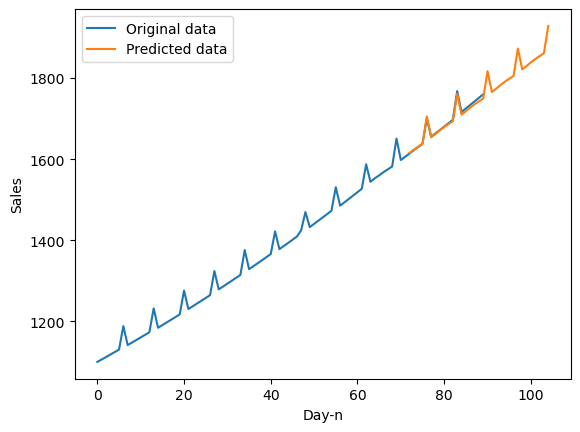

In [59]:
# Combine the data for categories a1 and a2
data_a = pd.concat([data_a1, data_a2], axis=0)

# Sum the sales for each day across categories a1 and a2
data_a = data_a.groupby(data_a.index).sum()

# Split the data into train and test sets
train_a = data_a['Sales'].iloc[:72]
test_a = data_a['Sales'].iloc[72:]

# Create and fit the SARIMAX model
model_a = SARIMAX(train_a, order=(0, 1, 1), seasonal_order=(0, 1, 1, frequency_a1))
model_fit_a = model_a.fit()

# Generate predictions for the test set
predictions_a = model_fit_a.forecast(steps=len(test_a)+15)

# Evaluate the model performance (MAPE & MAE)
mape_a = mean_absolute_percentage_error(predictions_a[:18], test_a)
mae_a = mean_absolute_error(predictions_a[:18], test_a)
print(f'MAPE : {mape_a}')
print(f'MAE : {mae_a}')

# Plot the original data and the predicted values
plt.plot(data_a.index, data_a['Sales'], label='Original data')
plt.plot(predictions_a.index, predictions_a, label='Predicted data')
plt.legend()
plt.xlabel('Day-n')
plt.ylabel('Sales')
plt.show()


For category A, we can see the historical data pattern is almost the same as the product A2. This happens, because the product A1 sales is significantly higher than the product A2. From the graph, we can see the model is able to create the same pattern as the historical sales data. The evaluation score is also very good with MAPE 0.2% and MAE 3.9 units in sales. This means the model is able to create a forecast for category A with very low error.

In [60]:
# showing prediction result for category A
pred_a = predictions_a.tail(15)
pred_a

90     1816.773812
91     1765.601332
92     1773.688261
93     1782.843012
94     1790.823367
95     1798.026150
96     1805.305766
97     1872.592017
98     1821.419537
99     1829.506466
100    1838.661217
101    1846.641572
102    1853.844354
103    1861.123971
104    1928.410222
Name: predicted_mean, dtype: float64

### Category B

Next, the category B. As stated before, we need to resample the data for product B1 to have the same length as product B2. Then, we can create the model for forecasting the sales for category B. The order used in this model will follow the order we used on product B2 because the pattern of historical data on category B will be similar to product B2. The evaluation method is also the same, we will use MAPE and MAE.

MAPE : 0.013789886142045658
MAE : 81.94084996963414


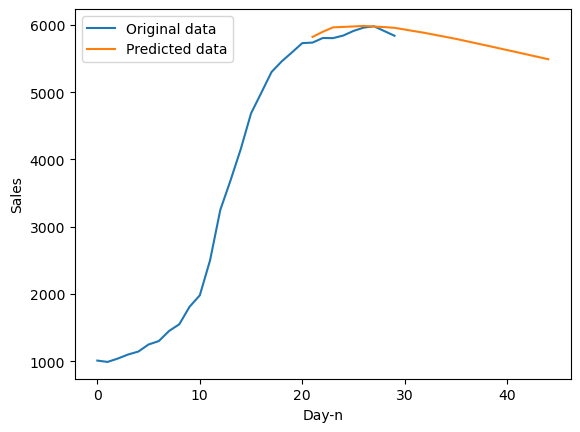

In [61]:
# Resample data b1 to have the same length with data b2
data_b1_resampled = data_b1.tail(30)
data_b1_resampled.reset_index(inplace=True,drop=True)

# Combine the data for categories a1 and a2
data_b = pd.concat([data_b1_resampled, data_b2], axis=0)

# Sum the sales for each day across categories a1 and a2
data_b = data_b.groupby(data_b.index).sum()

# Split the data into train and test sets
train_b = data_b['Sales'].iloc[:21]
test_b = data_b['Sales'].iloc[21:]

# Create and fit the SARIMAX model
model_b = SARIMAX(train_b, order=(1, 0, 1), seasonal_order=(1, 0, 1, 6))
model_fit_b = model_b.fit()

# Generate predictions for the test set
predictions_b = model_fit_b.forecast(steps=len(test_b)+15)

# Evaluate the model performance (MAPE & MAE)
mape_b = mean_absolute_percentage_error(predictions_b[:9], test_b)
mae_b = mean_absolute_error(predictions_b[:9], test_b)
print(f'MAPE : {mape_b}')
print(f'MAE : {mae_b}')

# Plot the original data and the predicted values
plt.plot(data_b.index, data_b['Sales'], label='Original data')
plt.plot(predictions_b.index, predictions_b, label='Predicted data')
plt.legend()
plt.xlabel('Day-n')
plt.ylabel('Sales')
plt.show()

For category B, we can see the historical data pattern is almost the same as the product B2. This happens, because the product B2 sales is significantly higher than the product A2. From the graph, we can see the model is able to create a forecast for category B by continuing the pattern on the tail of category B sales. The evaluation score is also very good with MAPE 1% and MAE 81.9 units in sales. This means the model is able to create a forecast for category B with very low error. But, same as stated before, the score we achieved for forecasting category B looks good, but it's important to note that we only had 30 days of data. This means that the accuracy of our model may not be as reliable as it would be with more data.

While our model performed well on the test set, forecasting 14 days ahead is a more difficult task, and there may be more uncertainty in the results.

In conclusion, our model produced a highly accurate forecast for category B with very low error, but we cannot be completely certain of its accuracy without more data.

In [62]:
# showing prediction result for category B
pred_b = predictions_b.tail(15)
pred_b

30    5931.961170
31    5906.443938
32    5881.245859
33    5851.705642
34    5822.703000
35    5793.253702
36    5759.902764
37    5726.850003
38    5694.045961
39    5660.272463
40    5626.802650
41    5593.378501
42    5559.096847
43    5525.053316
44    5491.233991
Name: predicted_mean, dtype: float64

# Conclusion

In this project, our goal was to create a forecasting model that accurately predicts sales for our products A1, A2, B1, and B2. We used the SARIMAX algorithm with optimized parameters and evaluated the models using MAPE and MAE. All of the models we created had very low errors, indicating their high accuracy.

The model for product A1 had a MAPE score of 0.5%, while the model for product A2 had a score close to 0%. The model for product B1 had a MAPE score of 1%, and the model for product B2 had a MAPE score of 0.9%. We also created a forecasting model for each product category, with a MAPE score of 0.2% for category A and 1.3% for category B.

The reason why the model for product A1, A2, and category A had a good score is because the sales data had a clear pattern that the model was able to detect and forecast accurately. On the other hand, the model for product B1 had a lower score because there was no specific pattern in the sales data. For product B2, although we achieved a very good score of 0.2%, it's important to note that we only had 30 days of data, which may limit the reliability of the model.

To further improve the models, we can explore other algorithms for sales data without a particular pattern like product B1. For sales data with S-shaped growth patterns like product B2, we can use a sigmoid function for forecasting future sales. It's crucial to continuously monitor and refine the forecasting models as new data becomes available and adjust the forecasting approach as necessary to maintain accuracy and reliability.

Overall, the forecasting models developed in this project offer valuable insights and predictions for sales, providing a useful tool for businesses to optimize their inventory management and improve decision-making processes.